# How US House Prices Got Impacted - Data Collection and Preparation

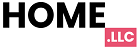

### Problem Statement:
- Find publicly available data for key factors that influence US home prices *nationally*. 
- Then, build a data science model that explains how these factors impacted home prices over the last 20 years.
- Use the S&P Case-Schiller Home Price Index as a proxy for home prices: fred.stlouisfed.org/series/CSUSHPISA.
- Once done, please respond back on AngelList with a *link* to your outputs in the best suitable format.
- You have 7 days from today to submit your output. 
- Do not use pre-existing datasets for this assignment. Most factors that influence home prices at a national level can be individually sourced from public websites.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading CASE-SHILLER Index
df_cs = pd.read_csv('Data/CSUSHPISA.csv', names = ["date", "home_price"], skiprows = 1)
df_cs = df_cs[df_cs['date'] != '2023-06-01']
df_cs['date'] = pd.to_datetime(df_cs['date'])
df_cs

,date,home_price
0,2003-06-01,132.649
1,2003-07-01,133.777
2,2003-08-01,134.968
3,2003-09-01,136.294
4,2003-10-01,137.532
...,...,...
235,2023-01-01,296.601
236,2023-02-01,296.958
237,2023-03-01,298.210
238,2023-04-01,300.214


In [3]:
df_cs[df_cs['date'] == '2003-06-01']

,date,home_price
0,2003-06-01,132.649


In [4]:
df_cs.dtypes

date          datetime64[ns]
home_price           float64
dtype: object

In [5]:
# Interest Rate Data (Federal Funds Effective Rate)
df_fed_rate = pd.read_csv('Data/FEDFUNDS.csv', names = ["date", "interest_rates"], skiprows = 1)
df_fed_rate['date'] = pd.to_datetime(df_fed_rate['date'])
df_fed_rate

,date,interest_rates
0,2003-06-01,1.22
1,2003-07-01,1.01
2,2003-08-01,1.03
3,2003-09-01,1.01
4,2003-10-01,1.01
...,...,...
235,2023-01-01,4.33
236,2023-02-01,4.57
237,2023-03-01,4.65
238,2023-04-01,4.83


In [6]:
# Unemployment Rate 
df_unrate = pd.read_csv('Data/UNRATE.csv', names = ["date", "unemp_rate"], skiprows = 1)
df_unrate['date'] = pd.to_datetime(df_unrate['date'])
df_unrate

,date,unemp_rate
0,2003-06-01,6.3
1,2003-07-01,6.2
2,2003-08-01,6.1
3,2003-09-01,6.1
4,2003-10-01,6.0
...,...,...
235,2023-01-01,3.4
236,2023-02-01,3.6
237,2023-03-01,3.5
238,2023-04-01,3.4


In [7]:
# Real Disposable Personal Income
df_dpi = pd.read_csv('Data/DSPIC96.csv', names = ["date", "disposable_inc"], skiprows = 1)
df_dpi['date'] = pd.to_datetime(df_dpi['date'])
df_dpi

,date,disposable_inc
0,2003-06-01,10291.2
1,2003-07-01,10415.5
2,2003-08-01,10487.7
3,2003-09-01,10369.1
4,2003-10-01,10408.4
...,...,...
235,2023-01-01,15504.7
236,2023-02-01,15545.3
237,2023-03-01,15598.6
238,2023-04-01,15633.0


In [8]:
# Real gross domestic product per capita (GDP)
df_gdp = pd.read_csv('Data/A939RX0Q048SBEA.csv', names = ["date", "gdp_per_cap"], skiprows = 1)
df_gdp['date'] = pd.to_datetime(df_gdp['date'])
df_gdp

,date,gdp_per_cap
0,2003-04-01,47342.0
1,2003-07-01,48012.0
2,2003-10-01,48450.0
3,2004-01-01,48633.0
4,2004-04-01,48905.0
...,...,...
76,2022-04-01,59688.0
77,2022-07-01,60080.0
78,2022-10-01,60376.0
79,2023-01-01,60611.0


In [9]:
# New Privately-Owned Housing Units Completed: Total Units 
df_new_houses_owned = pd.read_csv('Data/COMPUTSA.csv', names = ["date", "new_houses_owned"], skiprows = 1)
df_new_houses_owned['date'] = pd.to_datetime(df_new_houses_owned['date'])
df_new_houses_owned

,date,new_houses_owned
0,2003-06-01,1641.0
1,2003-07-01,1680.0
2,2003-08-01,1570.0
3,2003-09-01,1719.0
4,2003-10-01,1728.0
...,...,...
235,2023-01-01,1377.0
236,2023-02-01,1577.0
237,2023-03-01,1528.0
238,2023-04-01,1416.0


In [10]:
# Producer Price Index by Commodity: Special Indexes: Construction Materials (Construction price index)
df_contruction_price = pd.read_csv('Data/WPUSI012011.csv', names = ["date", "construction_price"], skiprows = 1)
df_contruction_price['date'] = pd.to_datetime(df_contruction_price['date'])
df_contruction_price

,date,construction_price
0,2003-06-01,146.100
1,2003-07-01,147.000
2,2003-08-01,147.200
3,2003-09-01,149.000
4,2003-10-01,149.600
...,...,...
235,2023-01-01,327.338
236,2023-02-01,330.532
237,2023-03-01,331.729
238,2023-04-01,333.549


In [11]:
# Urban population (% of total population) - United States
df_percent_pop = pd.read_csv('Data/API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_5734574.csv')
# df_percent_pop['DATE'] = pd.to_datetime(df_percent_pop['DATE'])
df_percent_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.563810,14.811410,15.069249,15.347976,15.640195,15.941282,...,33.476212,33.936963,34.425584,34.894753,35.358901,35.847598,36.336259,36.828302,37.323699,37.824593
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,...,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.705391,15.090123,15.484076,15.897592,16.329208,16.778650,...,43.554094,44.180175,44.805863,45.425066,46.039478,46.649426,47.255413,47.857831,48.454806,49.047385
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,...,62.002000,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,68.081000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Urban population (% of total population),SP.URB.TOTL.IN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,9.100000,9.459000,9.831000,10.216000,10.614000,11.026000,...,33.559000,34.165000,34.777000,35.394000,36.016000,36.642000,37.273000,37.908000,38.546000,39.188000
263,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,46.619000,46.793000,46.906000,47.020000,47.134000,47.248000,...,63.793000,64.312000,64.828000,65.341000,65.850000,66.355000,66.856000,67.354000,67.847000,68.335000
264,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,18.145000,18.951000,19.785000,20.712000,22.015000,23.372000,...,40.865000,41.382000,41.907000,42.438000,42.976000,43.521000,44.072000,44.629000,45.192000,45.761000


In [12]:
df_percent_pop[(df_percent_pop['Country Name'] == 'United States')]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
251,United States,USA,Urban population (% of total population),SP.URB.TOTL.IN.ZS,69.996,70.377,70.757,71.134,71.508,71.879,...,81.299,81.483,81.671,81.862,82.058,82.256,82.459,82.664,82.873,83.084


In [13]:
# Identify columns containing year values (assuming they start with '19' or '20')
year_columns = [col for col in df_percent_pop.columns if col.startswith('19') or col.startswith('20')]

# Use the melt function to convert columns to rows
melted_df = df_percent_pop.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars=year_columns, var_name='Year', value_name='Percent Population')

# Display the melted DataFrame
melted_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Percent Population
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,50.776000
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,14.563810
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,8.401000
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,14.705391
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,10.435000
...,...,...,...,...,...,...
16753,Kosovo,XKX,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,NaN
16754,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,39.188000
16755,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,68.335000
16756,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,45.761000


In [14]:
melted_df['Year'] = melted_df['Year'].astype('int')

In [15]:
melted_df.dtypes

Country Name           object
Country Code           object
Indicator Name         object
Indicator Code         object
Year                    int32
Percent Population    float64
dtype: object

In [16]:
df_percent_pop = melted_df[(melted_df['Country Name'] == 'United States') & (melted_df['Year'] > 1999)].reset_index().drop(columns = ['index', 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
df_percent_pop

,Year,Percent Population
0,2000,79.057
1,2001,79.234
2,2002,79.409
3,2003,79.583
4,2004,79.757
5,2005,79.928
6,2006,80.099
7,2007,80.269
8,2008,80.438
9,2009,80.606


In [17]:
df_percent_pop.rename(columns={'Year': 'year', 'Percent Population': 'percent_population'}, inplace=True)
df_percent_pop

,year,percent_population
0,2000,79.057
1,2001,79.234
2,2002,79.409
3,2003,79.583
4,2004,79.757
5,2005,79.928
6,2006,80.099
7,2007,80.269
8,2008,80.438
9,2009,80.606


In [18]:
# # Create a new 'date' column with month 1 and day 1 for each year
# df_percent_pop['date'] = pd.to_datetime(df_percent_pop['year'], format='%Y').dt.strftime('%Y-%m-01')

# # Drop the 'year' column if you no longer need it
# df_percent_pop.drop(columns=['year'], inplace=True)

# # Display the updated DataFrame
# df_percent_pop



df_percent_pop['date'] = pd.to_datetime(df_percent_pop['year'], format='%Y').dt.to_period('Y').dt.to_timestamp()

# Drop the 'year' column if you no longer need it
df_percent_pop.drop(columns=['year'], inplace=True)

# Display the updated DataFrame
df_percent_pop

,percent_population,date
0,79.057,2000-01-01
1,79.234,2001-01-01
2,79.409,2002-01-01
3,79.583,2003-01-01
4,79.757,2004-01-01
5,79.928,2005-01-01
6,80.099,2006-01-01
7,80.269,2007-01-01
8,80.438,2008-01-01
9,80.606,2009-01-01


In [19]:
# Government subsidies: Federal: Housing
df_housing_sub = pd.read_csv('Data/L312051A027NBEA.csv', names = ["date", "housing_sub"], skiprows = 1)
df_housing_sub['date'] = pd.to_datetime(df_housing_sub['date'])
df_housing_sub

,date,housing_sub
0,2003-01-01,25.930
1,2004-01-01,27.201
2,2005-01-01,27.651
3,2006-01-01,28.604
4,2007-01-01,29.512
5,2008-01-01,29.876
6,2009-01-01,32.883
7,2010-01-01,32.669
8,2011-01-01,34.230
9,2012-01-01,33.283


In [20]:
# Total Households
df_total_houses = pd.read_csv('Data/TTLHH.csv', names = ["date", "total_houses"], skiprows = 1)
df_total_houses['date'] = pd.to_datetime(df_total_houses['date'])
df_total_houses

,date,total_houses
0,2003-01-01,111278.0
1,2004-01-01,112000.0
2,2005-01-01,113343.0
3,2006-01-01,114384.0
4,2007-01-01,116011.0
5,2008-01-01,116783.0
6,2009-01-01,117181.0
7,2010-01-01,117538.0
8,2011-01-01,119927.0
9,2012-01-01,121084.0


In [21]:
# Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
# CPIAUCSL.csv
df_cp_index = pd.read_csv('Data/CPIAUCSL.csv', names = ["date", "cp_index"], skiprows = 1)
df_cp_index['date'] = pd.to_datetime(df_cp_index['date'])
df_cp_index

,date,cp_index
0,2003-06-01,183.100
1,2003-07-01,183.700
2,2003-08-01,184.500
3,2003-09-01,185.100
4,2003-10-01,184.900
...,...,...
235,2023-01-01,300.536
236,2023-02-01,301.648
237,2023-03-01,301.808
238,2023-04-01,302.918


In [22]:
# Working Age Population: Aged 15-64: All Persons for the United States (LFWA64TTUSM647S)
# LFWA64TTUSM647S.csv
df_working_population = pd.read_csv('Data/LFWA64TTUSM647S.csv', names = ["date", "working_population"], skiprows = 1)
df_working_population['date'] = pd.to_datetime(df_working_population['date'])
df_working_population

,date,working_population
0,2003-06-01,1.868013e+08
1,2003-07-01,1.870688e+08
2,2003-08-01,1.873079e+08
3,2003-09-01,1.875407e+08
4,2003-10-01,1.877386e+08
...,...,...
235,2023-01-01,2.081242e+08
236,2023-02-01,2.082332e+08
237,2023-03-01,2.082733e+08
238,2023-04-01,2.083870e+08


In [23]:
#  Real Median Household Income in the United States (MEHOINUSA672N)
# MEHOINUSA672N.csv
df_median_income = pd.read_csv('Data/MEHOINUSA672N.csv', names = ["date", "median_income"], skiprows = 1)
df_median_income['date'] = pd.to_datetime(df_median_income['date'])
df_median_income

,date,median_income
0,2003-01-01,63967
1,2004-01-01,63745
2,2005-01-01,64427
3,2006-01-01,64930
4,2007-01-01,65801
5,2008-01-01,63455
6,2009-01-01,63011
7,2010-01-01,61364
8,2011-01-01,60428
9,2012-01-01,60313


### Merging

In [24]:
# List of DataFrames to merge which have monthly data
dfs_to_merge = [df_cs, df_contruction_price, df_new_houses_owned, df_dpi, df_unrate, df_fed_rate, df_cp_index, df_working_population]

# Merge DataFrames using a loop
df = df_cs  # Initialize with the first DataFrame
for df_to_merge in dfs_to_merge[1:]:
    df = df.merge(df_to_merge, on='date', how='inner')
df

,date,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population
0,2003-06-01,132.649,146.100,1641.0,10291.2,6.3,1.22,183.100,1.868013e+08
1,2003-07-01,133.777,147.000,1680.0,10415.5,6.2,1.01,183.700,1.870688e+08
2,2003-08-01,134.968,147.200,1570.0,10487.7,6.1,1.03,184.500,1.873079e+08
3,2003-09-01,136.294,149.000,1719.0,10369.1,6.1,1.01,185.100,1.875407e+08
4,2003-10-01,137.532,149.600,1728.0,10408.4,6.0,1.01,184.900,1.877386e+08
...,...,...,...,...,...,...,...,...,...
235,2023-01-01,296.601,327.338,1377.0,15504.7,3.4,4.33,300.536,2.081242e+08
236,2023-02-01,296.958,330.532,1577.0,15545.3,3.6,4.57,301.648,2.082332e+08
237,2023-03-01,298.210,331.729,1528.0,15598.6,3.5,4.65,301.808,2.082733e+08
238,2023-04-01,300.214,333.549,1416.0,15633.0,3.4,4.83,302.918,2.083870e+08


### Adding quarterly and yearly data to the final df

In [25]:
# df_total_houses, df_housing_sub(interpolate), df_percent_pop(interpolate,doesn't matter if same), df_gdp(quarterly data,interpolate), median_income
df_total_houses

,date,total_houses
0,2003-01-01,111278.0
1,2004-01-01,112000.0
2,2005-01-01,113343.0
3,2006-01-01,114384.0
4,2007-01-01,116011.0
5,2008-01-01,116783.0
6,2009-01-01,117181.0
7,2010-01-01,117538.0
8,2011-01-01,119927.0
9,2012-01-01,121084.0


In [26]:
# set the timeperiod as index 
df_total_houses.set_index('date', inplace=True)
df_total_houses

,total_houses
date,
2003-01-01,111278.0
2004-01-01,112000.0
2005-01-01,113343.0
2006-01-01,114384.0
2007-01-01,116011.0
2008-01-01,116783.0
2009-01-01,117181.0
2010-01-01,117538.0
2011-01-01,119927.0


<Axes: xlabel='date'>

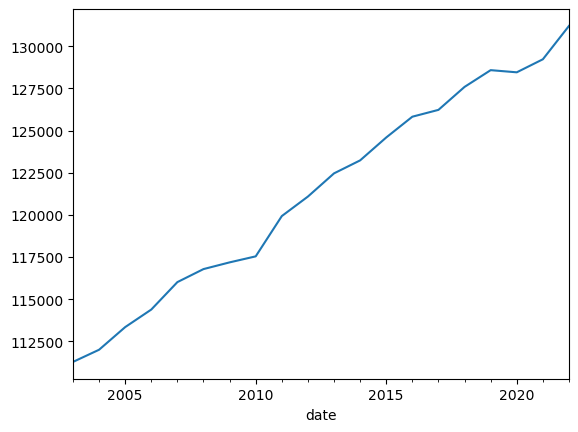

In [27]:
df_total_houses.total_houses.plot()

<Axes: >

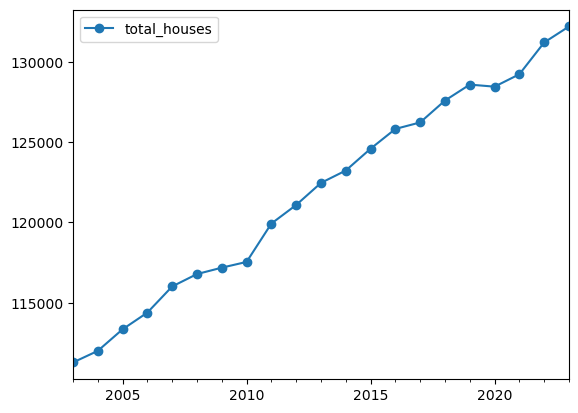

In [28]:
# Calculate the forecast using the drift method
y_t = df_total_houses.total_houses.iloc[-1]
y_0 = df_total_houses.total_houses.iloc[0]

m = (y_t - y_0) / len(df_total_houses.total_houses)
h = 1

forecasted_value = y_t + m * h

# Create a new DataFrame with the forecasted value and date for 2023
new_data = pd.DataFrame({'total_houses': [forecasted_value]}, index=pd.to_datetime(['2023-01-01']))

# Concatenate the new data with the existing DataFrame
df_total_houses = pd.concat([df_total_houses, new_data])

# Plot the updated DataFrame
df_total_houses.plot(style='-o')

In [29]:
df_total_houses = df_total_houses.reset_index()
df_total_houses.rename(columns={'index': 'date'}, inplace=True)

In [30]:
df_total_houses

,date,total_houses
0,2003-01-01,111278.0
1,2004-01-01,112000.0
2,2005-01-01,113343.0
3,2006-01-01,114384.0
4,2007-01-01,116011.0
5,2008-01-01,116783.0
6,2009-01-01,117181.0
7,2010-01-01,117538.0
8,2011-01-01,119927.0
9,2012-01-01,121084.0


In [31]:
# df_total_houses, df_housing_sub(interpolate), df_percent_pop(interpolate,doesn't matter if same), df_gdp(quarterly data,interpolate), median_income

# List of DataFrames to merge which have monthly data
dfs_to_merge = [df_total_houses, df_housing_sub, df_percent_pop, df_gdp, df_median_income]

# Merge DataFrames using a loop
for df_to_merge in dfs_to_merge[1:]:
    df = df.merge(df_to_merge, on='date', how='left')
df

,date,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
0,2003-06-01,132.649,146.100,1641.0,10291.2,6.3,1.22,183.100,1.868013e+08,NaN,NaN,NaN,NaN
1,2003-07-01,133.777,147.000,1680.0,10415.5,6.2,1.01,183.700,1.870688e+08,NaN,NaN,48012.0,NaN
2,2003-08-01,134.968,147.200,1570.0,10487.7,6.1,1.03,184.500,1.873079e+08,NaN,NaN,NaN,NaN
3,2003-09-01,136.294,149.000,1719.0,10369.1,6.1,1.01,185.100,1.875407e+08,NaN,NaN,NaN,NaN
4,2003-10-01,137.532,149.600,1728.0,10408.4,6.0,1.01,184.900,1.877386e+08,NaN,NaN,48450.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023-01-01,296.601,327.338,1377.0,15504.7,3.4,4.33,300.536,2.081242e+08,NaN,NaN,60611.0,NaN
236,2023-02-01,296.958,330.532,1577.0,15545.3,3.6,4.57,301.648,2.082332e+08,NaN,NaN,NaN,NaN
237,2023-03-01,298.210,331.729,1528.0,15598.6,3.5,4.65,301.808,2.082733e+08,NaN,NaN,NaN,NaN
238,2023-04-01,300.214,333.549,1416.0,15633.0,3.4,4.83,302.918,2.083870e+08,NaN,NaN,60852.0,NaN


In [32]:
df.isna().sum()

date                    0
home_price              0
construction_price      0
new_houses_owned        0
disposable_inc          0
unemp_rate              0
interest_rates          0
cp_index                0
working_population      0
housing_sub           222
percent_population    221
gdp_per_cap           160
median_income         222
dtype: int64

In [33]:
df.set_index('date', inplace=True)

In [34]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["gdp_per_cap"] = df["gdp_per_cap"].interpolate()
df

,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
date,,,,,,,,,,,,
2003-06-01,132.649,146.100,1641.0,10291.2,6.3,1.22,183.100,1.868013e+08,NaN,NaN,NaN,NaN
2003-07-01,133.777,147.000,1680.0,10415.5,6.2,1.01,183.700,1.870688e+08,NaN,NaN,48012.000000,NaN
2003-08-01,134.968,147.200,1570.0,10487.7,6.1,1.03,184.500,1.873079e+08,NaN,NaN,48158.000000,NaN
2003-09-01,136.294,149.000,1719.0,10369.1,6.1,1.01,185.100,1.875407e+08,NaN,NaN,48304.000000,NaN
2003-10-01,137.532,149.600,1728.0,10408.4,6.0,1.01,184.900,1.877386e+08,NaN,NaN,48450.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,296.601,327.338,1377.0,15504.7,3.4,4.33,300.536,2.081242e+08,NaN,NaN,60611.000000,NaN
2023-02-01,296.958,330.532,1577.0,15545.3,3.6,4.57,301.648,2.082332e+08,NaN,NaN,60691.333333,NaN
2023-03-01,298.210,331.729,1528.0,15598.6,3.5,4.65,301.808,2.082733e+08,NaN,NaN,60771.666667,NaN


In [35]:
df.isna().sum()

home_price              0
construction_price      0
new_houses_owned        0
disposable_inc          0
unemp_rate              0
interest_rates          0
cp_index                0
working_population      0
housing_sub           222
percent_population    221
gdp_per_cap             1
median_income         222
dtype: int64

In [36]:
# Define a list of column names to interpolate
columns_to_interpolate = ['housing_sub', 'percent_population', 'median_income']

# Iterate through the columns and interpolate missing values
for column in columns_to_interpolate:
    df[column].interpolate(method='linear', inplace=True)

df

,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
date,,,,,,,,,,,,
2003-06-01,132.649,146.100,1641.0,10291.2,6.3,1.22,183.100,1.868013e+08,NaN,NaN,NaN,NaN
2003-07-01,133.777,147.000,1680.0,10415.5,6.2,1.01,183.700,1.870688e+08,NaN,NaN,48012.000000,NaN
2003-08-01,134.968,147.200,1570.0,10487.7,6.1,1.03,184.500,1.873079e+08,NaN,NaN,48158.000000,NaN
2003-09-01,136.294,149.000,1719.0,10369.1,6.1,1.01,185.100,1.875407e+08,NaN,NaN,48304.000000,NaN
2003-10-01,137.532,149.600,1728.0,10408.4,6.0,1.01,184.900,1.877386e+08,NaN,NaN,48450.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,296.601,327.338,1377.0,15504.7,3.4,4.33,300.536,2.081242e+08,45.296,83.084,60611.000000,70784.0
2023-02-01,296.958,330.532,1577.0,15545.3,3.6,4.57,301.648,2.082332e+08,45.296,83.084,60691.333333,70784.0
2023-03-01,298.210,331.729,1528.0,15598.6,3.5,4.65,301.808,2.082733e+08,45.296,83.084,60771.666667,70784.0


In [37]:
df.isna().sum()

home_price            0
construction_price    0
new_houses_owned      0
disposable_inc        0
unemp_rate            0
interest_rates        0
cp_index              0
working_population    0
housing_sub           7
percent_population    7
gdp_per_cap           1
median_income         7
dtype: int64

In [38]:
(df.isna().sum() / len(df)) * 100

home_price            0.000000
construction_price    0.000000
new_houses_owned      0.000000
disposable_inc        0.000000
unemp_rate            0.000000
interest_rates        0.000000
cp_index              0.000000
working_population    0.000000
housing_sub           2.916667
percent_population    2.916667
gdp_per_cap           0.416667
median_income         2.916667
dtype: float64

Let's remove the NaN values.

In [39]:
# Drop rows with NaN values
df.dropna(inplace=True)

In [40]:
(df.isna().sum() / len(df)) * 100

home_price            0.0
construction_price    0.0
new_houses_owned      0.0
disposable_inc        0.0
unemp_rate            0.0
interest_rates        0.0
cp_index              0.0
working_population    0.0
housing_sub           0.0
percent_population    0.0
gdp_per_cap           0.0
median_income         0.0
dtype: float64

In [41]:
df

,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
date,,,,,,,,,,,,
2004-01-01,141.646,150.000,1709.0,10472.7,5.7,1.00,186.300,1.876868e+08,27.2010,79.75700,48633.000000,63745.000000
2004-02-01,143.191,153.400,1718.0,10491.3,5.6,1.01,186.700,1.878746e+08,27.2385,79.77125,48723.666667,63801.833333
2004-03-01,145.059,156.500,1794.0,10533.6,5.8,1.00,187.100,1.880565e+08,27.2760,79.78550,48814.333333,63858.666667
2004-04-01,146.592,160.100,1938.0,10569.6,5.6,1.00,187.400,1.883187e+08,27.3135,79.79975,48905.000000,63915.500000
2004-05-01,148.185,162.700,1893.0,10623.3,5.6,1.00,188.200,1.884768e+08,27.3510,79.81400,49017.666667,63972.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,296.601,327.338,1377.0,15504.7,3.4,4.33,300.536,2.081242e+08,45.2960,83.08400,60611.000000,70784.000000
2023-02-01,296.958,330.532,1577.0,15545.3,3.6,4.57,301.648,2.082332e+08,45.2960,83.08400,60691.333333,70784.000000
2023-03-01,298.210,331.729,1528.0,15598.6,3.5,4.65,301.808,2.082733e+08,45.2960,83.08400,60771.666667,70784.000000


In [47]:
df.to_csv("house_price_impact.csv")

In [53]:
pd.read_csv("house_price_impact.csv")

,date,home_price,construction_price,new_houses_owned,disposable_inc,unemp_rate,interest_rates,cp_index,working_population,housing_sub,percent_population,gdp_per_cap,median_income
0,2004-01-01,141.646,150.000,1709.0,10472.7,5.7,1.00,186.300,1.876868e+08,27.2010,79.75700,48633.000000,63745.000000
1,2004-02-01,143.191,153.400,1718.0,10491.3,5.6,1.01,186.700,1.878746e+08,27.2385,79.77125,48723.666667,63801.833333
2,2004-03-01,145.059,156.500,1794.0,10533.6,5.8,1.00,187.100,1.880565e+08,27.2760,79.78550,48814.333333,63858.666667
3,2004-04-01,146.592,160.100,1938.0,10569.6,5.6,1.00,187.400,1.883187e+08,27.3135,79.79975,48905.000000,63915.500000
4,2004-05-01,148.185,162.700,1893.0,10623.3,5.6,1.00,188.200,1.884768e+08,27.3510,79.81400,49017.666667,63972.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2023-01-01,296.601,327.338,1377.0,15504.7,3.4,4.33,300.536,2.081242e+08,45.2960,83.08400,60611.000000,70784.000000
229,2023-02-01,296.958,330.532,1577.0,15545.3,3.6,4.57,301.648,2.082332e+08,45.2960,83.08400,60691.333333,70784.000000
230,2023-03-01,298.210,331.729,1528.0,15598.6,3.5,4.65,301.808,2.082733e+08,45.2960,83.08400,60771.666667,70784.000000
231,2023-04-01,300.214,333.549,1416.0,15633.0,3.4,4.83,302.918,2.083870e+08,45.2960,83.08400,60852.000000,70784.000000
